In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("14-income_evaluation.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

There were some issues with the column names, so they have been updated.

In [5]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
col_names = ["age", "workclass", "finalweight", "education", "education_num", "marital_status",
             "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
             "hours_per_week", "native_country", "income"]

In [7]:
df.columns = col_names

In [8]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [87]:
df.describe()

,age,finalweight,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# Missing Data Check
df.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
# Duplicated Data Check
df.duplicated().sum()

np.int64(24)

In [12]:
df = df.drop_duplicates()

In [13]:
# Separated categorical and numerical columns based on data types.
categorical_columns = [col for col in df.columns if df[col].dtype == "O"]
numerical_columns = [col for col in df.columns if df[col].dtype != "O"]

In [14]:
categorical_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [15]:
numerical_columns

['age',
 'finalweight',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [16]:
df[categorical_columns].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [17]:
df[numerical_columns].head()

,age,finalweight,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [18]:
df["income"].value_counts()

income
<=50K    24698
>50K      7839
Name: count, dtype: int64

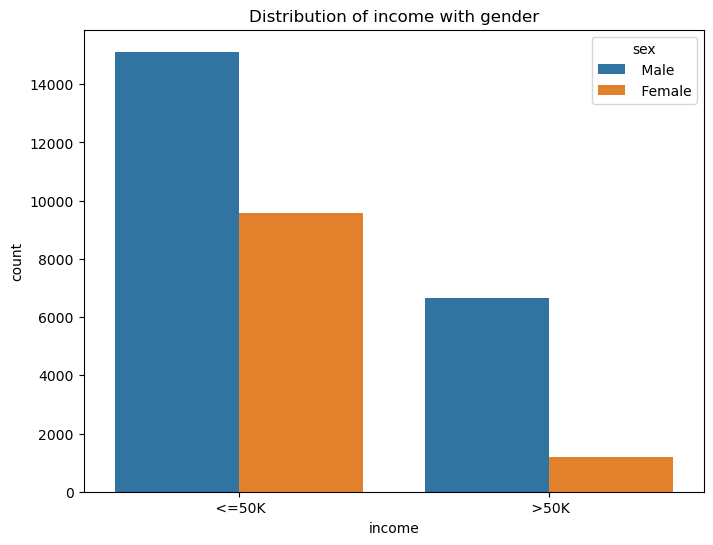

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="income", hue="sex", data=df)
ax.set_title("Distribution of income with gender")
plt.show()

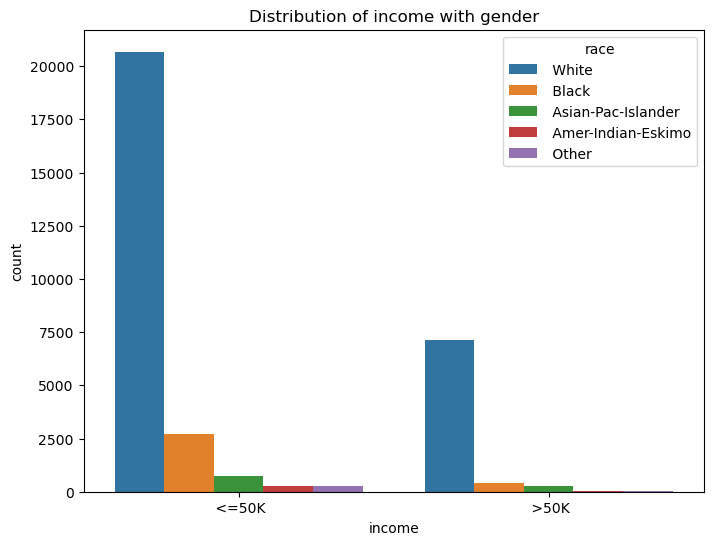

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="income", hue="race", data=df)
ax.set_title("Distribution of income with gender")
plt.show()

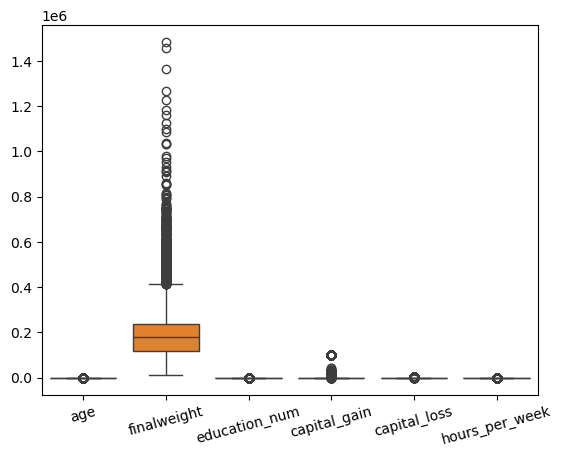

In [21]:
sns.boxplot(df[numerical_columns])
plt.xticks(rotation=15)
plt.show()

In [22]:
for col in categorical_columns:
    print(df[col].value_counts())
    print("-" * 25)

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
-------------------------
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64
-------------------------
marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
-------------------------
occupa

In [23]:
df["workclass"] = df["workclass"].replace(" ?", np.nan)
df["occupation"] = df["occupation"].replace(" ?", np.nan)
df["native_country"] = df["native_country"].replace(" ?", np.nan)

In [24]:
for col in ["workclass", "occupation", "native_country"]:
    print(df[col].value_counts())
    print("-" * 25)

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
-------------------------
occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64
-------------------------
native_country
United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100


In [25]:
df[categorical_columns].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     582
income               0
dtype: int64

In [26]:
df[numerical_columns].isnull().sum()

age               0
finalweight       0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

# Independent & Dependent Features

In [28]:
X = df.drop("income", axis=1)
y = df["income"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22775, 14), (9762, 14), (22775,), (9762,))

X_train.info()

In [31]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == "O"]
numerical = [col for col in X_train.columns if X_train[col].dtypes != "O"]

In [32]:
X_train[numerical].isnull().sum()

age               0
finalweight       0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [33]:
X_train[categorical].isnull().sum()

workclass         1279
education            0
marital_status       0
occupation        1284
relationship         0
race                 0
sex                  0
native_country     402
dtype: int64

### "Missing values will be imputed using the mode of categorical features"

In [34]:
# use mode of X_train rather than X_test to impute
for i in [X_train, X_test]:
    for col in ["workclass", "occupation", "native_country"]:
        i[col] = i[col].fillna(X_train[col].mode()[0])

In [35]:
X_train.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [36]:
X_test.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

# Encoding

In [37]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
13011,Private,Bachelors,Never-married,Tech-support,Own-child,White,Male,United-States
24494,Private,Some-college,Never-married,Other-service,Not-in-family,White,Female,United-States
16923,Private,Assoc-voc,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,India
25335,Self-emp-inc,Masters,Married-civ-spouse,Sales,Husband,White,Male,United-States
12363,Local-gov,Assoc-voc,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States


In [38]:
X_train[categorical].nunique()

workclass          8
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
dtype: int64

In [39]:
# Applied target mean encoding to 'native_country'; remaining categorical features encoded using one-hot encoding.

In [40]:
y_train.unique()

array([' <=50K', ' >50K'], dtype=object)

In [41]:
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == '>50K' else 0)
print(y_train_binary.unique())

[0 1]


In [42]:
target_means = y_train_binary.groupby(X_train['native_country']).mean()

In [43]:
target_means

native_country
Cambodia                      0.416667
Canada                        0.348315
China                         0.220000
Columbia                      0.047619
Cuba                          0.272727
Dominican-Republic            0.022222
Ecuador                       0.136364
El-Salvador                   0.111111
England                       0.317460
France                        0.428571
Germany                       0.354839
Greece                        0.368421
Guatemala                     0.043478
Haiti                         0.068966
Holand-Netherlands            0.000000
Honduras                      0.125000
Hong                          0.333333
Hungary                       0.250000
India                         0.400000
Iran                          0.464286
Ireland                       0.157895
Italy                         0.285714
Jamaica                       0.109375
Japan                         0.326087
Laos                          0.111111
Mexico    

In [44]:
X_train['native_country_encoded'] = X_train['native_country'].map(target_means)
X_train['native_country_encoded'] = X_train['native_country_encoded'].fillna(y_train_binary.mean())

X_test['native_country_encoded'] = X_test['native_country'].map(target_means)
X_test['native_country_encoded'] = X_test['native_country_encoded'].fillna(y_train_binary.mean())

In [45]:
X_train = X_train.drop("native_country", axis=1)
X_test = X_test.drop("native_country", axis=1)

In [46]:
X_train.head()

,age,workclass,finalweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country_encoded
13011,36,Private,316298,Bachelors,13,Never-married,Tech-support,Own-child,White,Male,0,0,40,0.242717
24494,30,Private,101283,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,40,0.242717
16923,41,Private,143003,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,7298,0,60,0.400000
25335,46,Self-emp-inc,216414,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,1977,60,0.242717
12363,37,Local-gov,249392,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,0.242717


In [47]:
X_test.head()

,age,workclass,finalweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country_encoded
24188,50,Private,167886,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,0.242717
26471,25,Private,33610,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,45,0.242717
26843,47,Private,239865,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1977,45,0.242717
8795,61,Private,30475,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,0.242717
27178,34,Private,226883,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,0.242717


In [48]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [49]:
# rest will be one hot encoded
one_hot_categories = ['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_categories)
    ],
    remainder='passthrough'  # leave the rest of the columns as it is
)

# Fit-transform
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [51]:
X_train.shape, X_train_enc.shape, X_test.shape, X_test_enc.shape

((22775, 14), (22775, 65), (9762, 14), (9762, 65))

In [52]:
# get all encoded column names
columns = encoder.get_feature_names_out()

In [53]:
columns

array(['cat__workclass_ Federal-gov', 'cat__workclass_ Local-gov',
       'cat__workclass_ Never-worked', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       'cat__workclass_ State-gov', 'cat__workclass_ Without-pay',
       'cat__education_ 10th', 'cat__education_ 11th',
       'cat__education_ 12th', 'cat__education_ 1st-4th',
       'cat__education_ 5th-6th', 'cat__education_ 7th-8th',
       'cat__education_ 9th', 'cat__education_ Assoc-acdm',
       'cat__education_ Assoc-voc', 'cat__education_ Bachelors',
       'cat__education_ Doctorate', 'cat__education_ HS-grad',
       'cat__education_ Masters', 'cat__education_ Preschool',
       'cat__education_ Prof-school', 'cat__education_ Some-college',
       'cat__marital_status_ Divorced',
       'cat__marital_status_ Married-AF-spouse',
       'cat__marital_status_ Married-civ-spouse',
       'cat__marital_status_ Married-spouse-absent',
       'cat__marital_status_ Never-mar

In [54]:
X_train = pd.DataFrame(X_train_enc, columns=columns, index=X_train.index)
X_test = pd.DataFrame(X_test_enc, columns=columns, index=X_test.index)

In [55]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
13011,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,36.0,316298.0,13.0,0.0,0.0,40.0,0.242717
24494,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,30.0,101283.0,10.0,0.0,0.0,40.0,0.242717
16923,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,41.0,143003.0,11.0,7298.0,0.0,60.0,0.400000
25335,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,46.0,216414.0,14.0,0.0,1977.0,60.0,0.242717
12363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,37.0,249392.0,11.0,0.0,0.0,40.0,0.242717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13128,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,42.0,174575.0,13.0,5178.0,0.0,40.0,0.242717
19657,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,49.0,52590.0,9.0,0.0,0.0,40.0,0.242717
9848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,59.0,221336.0,6.0,0.0,0.0,40.0,0.321918
10802,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,52.0,75839.0,10.0,0.0,0.0,40.0,0.242717


In [56]:
X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
24188,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,50.0,167886.0,10.0,0.0,0.0,40.0,0.242717
26471,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,25.0,33610.0,9.0,0.0,0.0,45.0,0.242717
26843,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,47.0,239865.0,9.0,0.0,1977.0,45.0,0.242717
8795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,61.0,30475.0,4.0,0.0,0.0,40.0,0.242717
27178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,34.0,226883.0,9.0,0.0,0.0,40.0,0.242717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25753,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,32.0,258406.0,10.0,0.0,0.0,72.0,0.052154
16004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,64.0,159938.0,9.0,8614.0,0.0,40.0,0.242717
11141,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,45.0,108859.0,9.0,0.0,0.0,40.0,0.242717
26572,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,33.0,136331.0,9.0,0.0,0.0,40.0,0.242717


In [86]:
X_train.describe()

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__education_ Bachelors,cat__education_ HS-grad,cat__education_ Masters,cat__education_ Some-college,...,cat__race_ Black,cat__race_ White,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
count,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000,...,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000,22775.000000
mean,0.029462,0.065950,-0.246015,0.034072,0.076663,0.039210,0.163688,0.323074,0.054050,0.223754,...,0.095587,-0.147003,-0.329396,0.078408,0.097592,0.027794,1057.953282,85.421515,0.094033,-0.004649
std,0.169102,0.248199,0.430697,0.181419,0.266062,0.194098,0.370001,0.467661,0.226122,0.416768,...,0.294031,0.354117,0.470004,0.684006,0.891576,0.858279,7388.728933,397.007935,2.455895,0.043199
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,-1.394689,-3.000000,0.000000,0.000000,-7.800000,-0.242717
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-0.450000,-0.506608,-0.333333,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.550000,0.493392,0.666667,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,2.650000,10.999419,2.000000,99999.000000,4356.000000,11.800000,0.221569


In [60]:
cols = X_train.columns

In [61]:
# we don't actually need scaling in dt algortihms but let's do it

In [62]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [64]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.05,1.164343,1.000000,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.35,-0.645547,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.20,-0.294369,0.333333,7298.0,0.0,4.0,0.157283
3,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.45,0.323569,1.333333,0.0,1977.0,4.0,0.000000
4,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.601162,0.333333,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22770,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.25,-0.028611,1.000000,5178.0,0.0,0.0,0.000000
22771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.60,-1.055421,-0.333333,0.0,0.0,0.0,0.000000
22772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.0,1.0,-1.0,1.10,0.365000,-1.333333,0.0,0.0,0.0,0.079201
22773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.75,-0.859722,0.000000,0.0,0.0,0.0,0.000000


# training

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
rfc = RandomForestClassifier(n_estimators=10, random_state=15)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.85300143413235
[[6844  501]
 [ 934 1483]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7345
        >50K       0.75      0.61      0.67      2417

    accuracy                           0.85      9762
   macro avg       0.81      0.77      0.79      9762
weighted avg       0.85      0.85      0.85      9762



In [67]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8564843269821758
[[6823  522]
 [ 879 1538]]
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7345
        >50K       0.75      0.64      0.69      2417

    accuracy                           0.86      9762
   macro avg       0.82      0.78      0.80      9762
weighted avg       0.85      0.86      0.85      9762



In [68]:
# let's try to see feature importance

rfc.feature_importances_

array([5.29660770e-03, 6.25711008e-03, 4.62804924e-06, 1.17432837e-02,
       6.05484017e-03, 8.82433010e-03, 5.07561456e-03, 3.51059831e-05,
       1.46081405e-03, 1.91958161e-03, 8.24127920e-04, 2.16652036e-04,
       5.14424081e-04, 1.59579576e-03, 1.18301474e-03, 2.55128643e-03,
       3.04727245e-03, 1.16150888e-02, 3.39502285e-03, 6.63177614e-03,
       8.35368807e-03, 1.94980180e-05, 4.30531823e-03, 5.61967034e-03,
       6.13237217e-03, 4.07170409e-04, 5.78781830e-02, 7.37155455e-04,
       2.72147966e-02, 1.61364061e-03, 1.66527577e-03, 6.01393793e-03,
       9.33887719e-06, 8.93031957e-03, 2.00039914e-02, 4.37739445e-03,
       3.31252800e-03, 4.40942794e-03, 7.05900436e-03, 1.02768373e-04,
       1.44142981e-02, 3.16570785e-03, 7.47142807e-03, 5.11731224e-03,
       5.16392193e-03, 4.38510230e-02, 1.01500373e-02, 1.33710800e-03,
       9.27719571e-03, 4.51259129e-03, 9.23721008e-03, 1.35303329e-03,
       3.77806276e-03, 5.04274269e-03, 7.09715745e-04, 7.25531032e-03,
      

In [69]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [70]:
feature_scores

remainder__finalweight              0.161191
remainder__age                      0.149302
remainder__capital_gain             0.093306
remainder__hours_per_week           0.087451
remainder__education_num            0.067191
                                      ...   
cat__occupation_ Priv-house-serv    0.000103
cat__workclass_ Without-pay         0.000035
cat__education_ Preschool           0.000019
cat__occupation_ Armed-Forces       0.000009
cat__workclass_ Never-worked        0.000005
Length: 65, dtype: float64

In [71]:
drop_columns = []
for i in feature_scores.tail(27).index:
    drop_columns.append(i[0])

In [72]:
drop_columns

['cat__occupation_ Farming-fishing',
 'cat__education_ Prof-school',
 'cat__race_ Asian-Pac-Islander',
 'cat__education_ Doctorate',
 'cat__occupation_ Handlers-cleaners',
 'cat__occupation_ Protective-serv',
 'cat__education_ Assoc-voc',
 'cat__education_ Assoc-acdm',
 'cat__education_ 11th',
 'cat__marital_status_ Widowed',
 'cat__marital_status_ Separated',
 'cat__education_ 7th-8th',
 'cat__education_ 10th',
 'cat__race_ Amer-Indian-Eskimo',
 'cat__relationship_ Other-relative',
 'cat__education_ 9th',
 'cat__education_ 12th',
 'cat__marital_status_ Married-spouse-absent',
 'cat__race_ Other',
 'cat__education_ 5th-6th',
 'cat__marital_status_ Married-AF-spouse',
 'cat__education_ 1st-4th',
 'cat__occupation_ Priv-house-serv',
 'cat__workclass_ Without-pay',
 'cat__education_ Preschool',
 'cat__occupation_ Armed-Forces',
 'cat__workclass_ Never-worked']

In [73]:
X_train = X_train.drop(columns=drop_columns, axis=1)
X_test = X_test.drop(columns=drop_columns, axis=1)

In [74]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8594550297070273
[[6862  483]
 [ 889 1528]]
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7345
        >50K       0.76      0.63      0.69      2417

    accuracy                           0.86      9762
   macro avg       0.82      0.78      0.80      9762
weighted avg       0.85      0.86      0.85      9762



# Hyperparameter Tuning

In [81]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

In [92]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [83]:
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params,n_iter=10,cv=3,verbose=2,n_jobs=-1)
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [5, 7, 'auto', 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500]},
                   verbose=2)

In [84]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 20,
 'max_features': 7,
 'max_depth': 10}

In [90]:
y_pred = rscv.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8640647408317967
[[7023  322]
 [1005 1412]]
              precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91      7345
        >50K       0.81      0.58      0.68      2417

    accuracy                           0.86      9762
   macro avg       0.84      0.77      0.80      9762
weighted avg       0.86      0.86      0.86      9762

